Excercise-10  190539T Sajeepan.T

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Question -01

x =  2.533858129332268 f(x)= -9.083837308516742


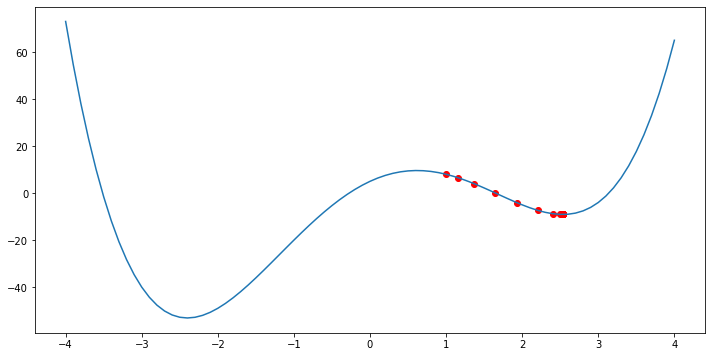

In [2]:
def f(x):

    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) -1
    return np.sum([x**i*w[M-i] for i in range(0, M+1)], axis=0)

def g(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w) -1 
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0, M+1)], axis=0) 
 

alpha= 0.02
x = 1
x_hist= np.array(x)
fx_hist= np.array(f(x)) 
for i in range(20):
    x = x - alpha*g(x) 
    x_hist = np.append(x_hist, x)
    fx_hist= np.append(fx_hist, f(x))

print('x = ',x,'f(x)=',f(x))
fig = plt.figure(figsize=(12,6)) 
ax =  plt.subplot (1,1,1)
delta = 0.1
x_ = np.arange(-4, 4+ delta, delta) 
ax.plot(x_, f(x_)) 
#ax.plot(x, g(x)) 
ax.scatter(x_hist, fx_hist, c='r')
plt.show()

In [3]:
#finding a root close to x0
from scipy.optimize import fsolve
from scipy.optimize import minimize
x0=0.7
root=fsolve(g,x0)#gradient is zero at this point
print(root)
#using scipy to find the minimum
minimum=minimize(f,x0)
print(minimum)

[0.61654501]
      fun: -9.083837308515939
 hess_inv: array([[0.02625738]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([2.53385792])


In [7]:
from tensorflow import keras
import tensorflow as tf

Question -02

In [14]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)
    
     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [5]:
cifar10 = keras.datasets.cifar10 
mnist = keras.datasets.mnist

In [8]:
(x_train ,y_train), (x_test,y_test) = cifar10.load_data( )
# ( x_train , y_train ) , ( x_test , y_test ) = mnist . load_data ( )
print (" x_train => ", x_train.shape)

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr) , :]
x_test = x_test[range(Nte) , :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

K=len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train/=255.
x_test/=255.

 x_train =>  (50000, 32, 32, 3)


In [11]:
std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay=0.1
epochs = 11
batch_size = 100
loss_hist = []
rng = np.random.default_rng(seed = 0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

    #forward pass
    y_pred = x@w + b
    loss = 1./batch_size*np.square(y_pred-y).sum()
    loss_hist.append(loss)

    #backward pass
    dy_pred = 1./batch_size* (2.0*(y_pred - y))
    dw = x.T @ dy_pred
    db = dy_pred.sum(axis = 0)*1
    w = w - lr*dw 
    b = b - lr*db

    if e % 5 == 0:
        print("Iteration %d / %d: loss %f"%(e, epochs,loss))
    if e % 10 == 0:
        lr *= lr_decay

Iteration 0 / 11: loss 1.000066
Iteration 5 / 11: loss 0.910106
Iteration 10 / 11: loss 0.903427


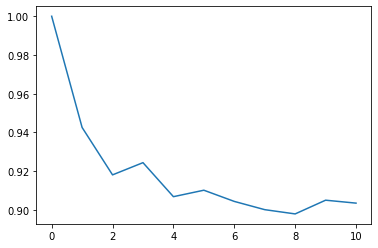

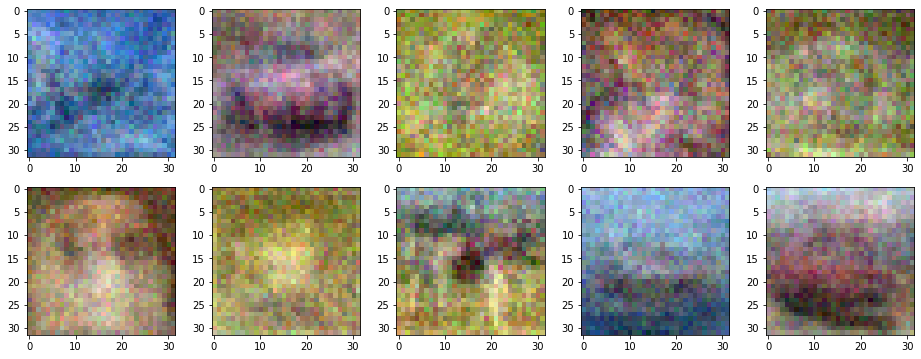

train_acc =  0.10498
test_acc =  0.1035


In [12]:
y_train_pred=x_train.dot(w)+b
y_test_pred=x_test.dot(w)+b
display(y_train,y_test,y_train_pred,y_test_pred,loss_hist,w,showim=True)